# [Personal Project]
---
> ## * Subject: SALARY PREDICTION of Players who sign a FA Contract
>![](http://news.sportslogos.net/wp-content/uploads/2014/09/MLB.png)
>---
> ## * Content:
>    * The goal of this project is to predict the 2018 FA Salaries of qualified players in 2018 based on many data that analized stats of players in the past. (Based on the FA results from 2006 to 2017)
>
>    * The 2018 FA Salaries are predicted by 2017 stats(2017.04 ~ 2017.10)
>
>    * **Analysis : Regression**
>---
> ## * Composition of data
>    * Rows : 1,225
>    * Columns : 72
>    * Dependent Variable : Salary(Y)
>    * Independent Variables : All variables except Dependent Variable
>---
> ## * Process of Progress
>    * EDA(Exploratory data analysis)
>    * Feature selection
>    * Modeling(OLS Regression)
>    * Cross Validation
>    * Model selection

---
** 'Import' all the necessary packages **

In [1]:
from sklearn.preprocessing import normalize, LabelEncoder
from patsy import dmatrix
from sklearn.linear_model import LinearRegression, LassoCV, LassoLarsCV, RidgeCV, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn import cross_validation
from sklearn.metrics import explained_variance_score, mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import xgboost as xgb
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [119]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

In [57]:
bat_df = pd.read_csv('../dataset/merged_bat.csv')

In [58]:
bat_df.rename(columns={"1B" : "Hits", "2B" : "Doubles", "3B" : "Triples","BB%": "BB_Percent", "K%": "K_Percent",
                       "BB/K" : "BB_per_K", "wRC+": "wRC_Plus", "Contract Yrs" : "Contract_Yrs",
                       "Total Salary($)" : "Total_Salary", "Avg Salary($)": "Salary"}, inplace=True)

In [59]:
bat_df.tail(15)

,Name,Yr,Team,G,AB,PA,H,Hits,Doubles,Triples,HR,R,RBI,BB,IBB,SO,BB_Percent,K_Percent,BB_per_K,BABIP,HBP,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,Contract_Yrs,Total_Salary,Salary
656,Trevor Plouffe,2016,Twins,84,319,344,83,57,13,1,12,35,47,19,0,60,5.5,17.4,0.32,0.284,2,3,1,11,1,0,-8.4,0.160,0.311,-2.1,0.260,0.303,0.420,0.723,-0.4,91.0,0.50,1.0,5250000.0,5.250000e+06
657,Welington Castillo,2016,Diamondbacks,113,416,457,110,72,24,0,14,41,68,33,3,121,7.2,26.5,0.27,0.337,4,4,0,5,2,0,9.8,0.159,0.319,0.4,0.264,0.322,0.423,0.745,1.6,91.0,0.64,2.0,13000000.0,6.500000e+06
658,Wilson Ramos,2016,Nationals,131,482,523,148,101,25,0,22,58,80,35,2,79,6.7,15.1,0.44,0.327,2,4,0,17,0,0,8.4,0.189,0.361,18.7,0.307,0.354,0.496,0.850,3.4,124.0,2.58,2.0,12500000.0,6.250000e+06
659,Yoenis Cespedes,2016,Mets,132,479,543,134,77,25,1,31,72,86,51,8,108,9.4,19.9,0.47,0.298,7,6,0,14,3,1,-9.2,0.251,0.369,22.8,0.280,0.354,0.530,0.884,3.2,135.0,3.21,4.0,110000000.0,2.750000e+07
660,Carlos Santana,2017,Indians,154,571,667,148,85,37,3,23,90,79,88,6,94,13.2,14.1,0.94,0.274,6,2,0,11,5,1,-7.3,0.196,0.350,16.5,0.259,0.363,0.455,0.818,3.0,117.0,0.56,3.0,60000000.0,2.000000e+07
661,Chris Iannetta,2017,Diamondbacks,89,272,316,69,33,19,0,17,38,43,37,0,87,11.7,27.5,0.43,0.308,6,1,0,3,0,0,5.4,0.257,0.367,12.3,0.254,0.354,0.511,0.865,2.2,120.0,1.32,2.0,8500000.0,4.250000e+06
662,Jay Bruce,2017,Indians,146,555,617,141,74,29,2,36,82,101,57,0,139,9.2,22.5,0.41,0.274,2,3,0,11,1,1,-5.6,0.254,0.350,15.1,0.254,0.324,0.508,0.832,2.7,118.0,2.14,3.0,39000000.0,1.300000e+07
663,Leonys Martin,2017,Cubs,49,128,138,22,15,3,1,3,14,9,8,1,33,5.8,23.9,0.24,0.207,2,0,0,2,7,4,2.1,0.109,0.224,-11.3,0.172,0.232,0.281,0.513,-0.4,35.0,-0.92,1.0,1750000.0,1.750000e+06
664,Matt Adams,2017,Braves,131,339,367,93,50,22,1,20,46,65,23,5,88,6.3,24.0,0.26,0.311,1,4,0,5,0,0,-2.3,0.248,0.346,7.8,0.274,0.319,0.522,0.841,1.6,112.0,0.68,1.0,4000000.0,4.000000e+06
665,Mitch Moreland,2017,Red Sox,149,508,576,125,69,34,0,22,73,79,57,6,120,9.9,20.8,0.48,0.278,6,5,0,14,0,1,-7.0,0.197,0.326,2.3,0.246,0.326,0.443,0.769,0.9,98.0,0.58,2.0,13000000.0,6.500000e+06


In [6]:
bat_yr = pd.DataFrame(bat_df['Yr'])

In [7]:
bat_df.dtypes

Name             object
Yr                int64
Team             object
G                 int64
AB                int64
PA                int64
H                 int64
Hits              int64
Doubles           int64
Triples           int64
HR                int64
R                 int64
RBI               int64
BB                int64
IBB               int64
SO                int64
BB_Percent      float64
K_Percent       float64
BB_per_K        float64
BABIP           float64
HBP               int64
SF                int64
SH                int64
GDP               int64
SB                int64
CS                int64
Def             float64
ISO             float64
wOBA            float64
wRAA            float64
AVG             float64
OBP             float64
SLG             float64
OPS             float64
WAR             float64
wRC_Plus        float64
WPA             float64
Contract_Yrs    float64
Total_Salary    float64
Salary          float64
dtype: object

In [8]:
## 각 변수별 기초통계량 확인

bat_df.describe()

,Yr,G,AB,PA,H,Hits,Doubles,Triples,HR,R,RBI,BB,IBB,SO,BB_Percent,K_Percent,BB_per_K,BABIP,HBP,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,Contract_Yrs,Total_Salary,Salary
count,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,6.710000e+02,6.710000e+02
mean,2010.444113,108.529061,353.643815,396.570790,92.383010,61.333830,18.363636,1.532042,11.160954,46.143070,45.296572,34.344262,2.545455,70.463487,8.367809,18.721461,0.500507,0.290103,3.703428,2.925484,1.898659,8.235469,5.135618,1.967213,-1.046200,0.147027,0.315128,1.429657,0.252680,0.320663,0.399668,0.720343,1.158420,92.640835,0.021565,1.727273,1.447159e+07,4.910081e+06
std,3.427643,35.889324,158.118848,177.128625,46.936517,32.629243,10.297752,2.070064,9.352358,26.164299,27.386073,21.841268,3.469776,37.350076,3.367125,6.927909,0.240105,0.041907,3.652434,2.311643,2.834518,5.533183,8.250795,2.505301,8.910394,0.061374,0.048361,12.603257,0.040087,0.046510,0.081648,0.119791,1.571657,32.281283,1.472100,1.419003,3.329320e+07,5.330325e+06
min,2005.000000,24.000000,58.000000,71.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,4.500000,0.000000,0.103000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-44.800000,0.000000,0.060000,-32.100000,0.068000,0.068000,0.068000,0.136000,-2.300000,-81.000000,-3.470000,1.000000,4.000000e+05,4.000000e+05
25%,2008.000000,83.000000,219.000000,244.500000,53.000000,36.000000,11.000000,0.000000,4.000000,24.000000,22.000000,19.000000,0.000000,41.000000,6.000000,13.750000,0.330000,0.266000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,-6.350000,0.104000,0.293500,-7.300000,0.232000,0.298000,0.348000,0.658500,0.050000,77.000000,-0.940000,1.000000,1.250000e+06,1.250000e+06
50%,2010.000000,114.000000,353.000000,399.000000,89.000000,58.000000,17.000000,1.000000,9.000000,44.000000,42.000000,31.000000,2.000000,65.000000,8.100000,17.900000,0.470000,0.295000,3.000000,3.000000,1.000000,7.000000,2.000000,1.000000,-0.500000,0.145000,0.317000,-0.800000,0.256000,0.323000,0.404000,0.727000,0.800000,95.000000,-0.150000,1.000000,3.020000e+06,2.750000e+06
75%,2013.000000,138.500000,491.500000,554.500000,129.000000,85.000000,26.000000,2.000000,16.000000,66.000000,62.000000,47.000000,3.000000,92.000000,10.300000,23.200000,0.630000,0.316000,5.000000,4.000000,3.000000,11.500000,6.000000,3.000000,4.850000,0.190000,0.345000,7.800000,0.281000,0.351000,0.452000,0.796000,2.100000,112.000000,0.660000,2.000000,1.025000e+07,6.500000e+06
max,2017.000000,162.000000,661.000000,730.000000,212.000000,166.000000,52.000000,16.000000,47.000000,123.000000,129.000000,116.000000,38.000000,208.000000,22.400000,49.300000,1.590000,0.394000,26.000000,11.000000,20.000000,32.000000,60.000000,17.000000,31.700000,0.344000,0.439000,54.600000,0.346000,0.423000,0.627000,1.039000,6.800000,177.000000,7.630000,10.000000,2.750000e+08,3.441667e+07


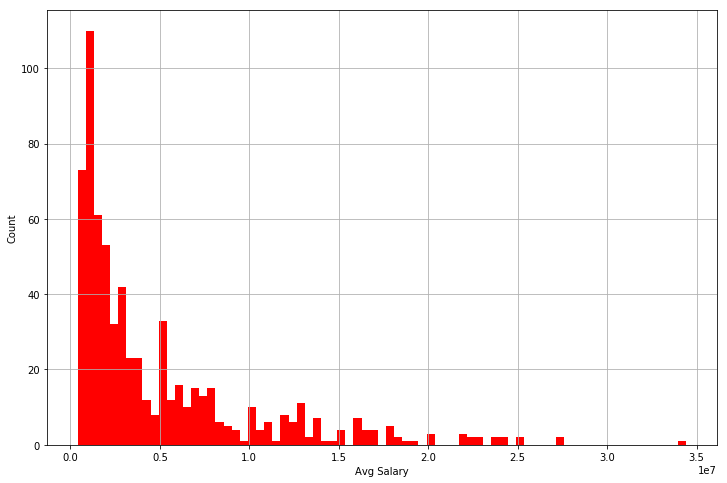

In [9]:
## Check distribution by Salary

plt.figure(figsize=(12, 8))
plt.hist(bat_df['Salary'], bins=75, color='r')
plt.xlabel('Avg Salary')
plt.ylabel('Count')
plt.grid()
plt.show()

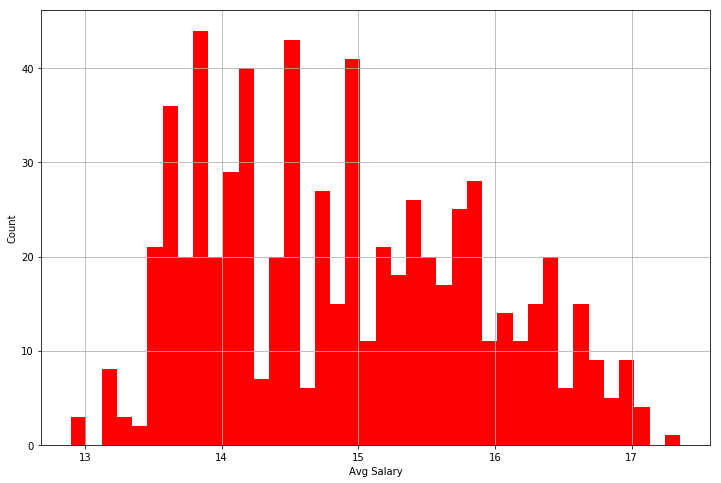

In [10]:
## Check distribution by Salary

plt.figure(figsize=(12, 8))
plt.hist(np.log1p(bat_df['Salary']), bins=40, color='r')
plt.xlabel('Avg Salary')
plt.ylabel('Count')
plt.grid()
plt.show()

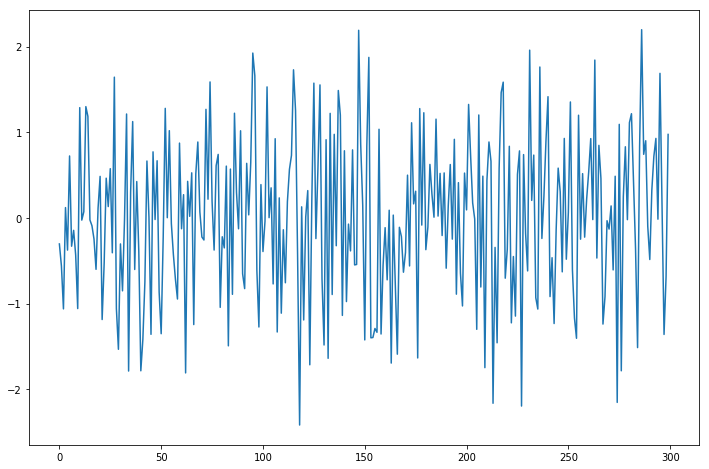

In [11]:
## Checking Gaussina white noise based on the year.

date = bat_df['Yr'].copy()
date = sp.stats.norm.rvs(size=300)
plt.figure(figsize=(12, 8))
plt.plot(date)

In [12]:
## Grasping the number of players who sign a FA contract by year

bat_df.groupby('Yr').count()['Name']

Yr
2005    59
2006    47
2007    50
2008    71
2009    62
2010    54
2011    59
2012    60
2013    53
2014    48
2015    54
2016    43
2017    11
Name: Name, dtype: int64

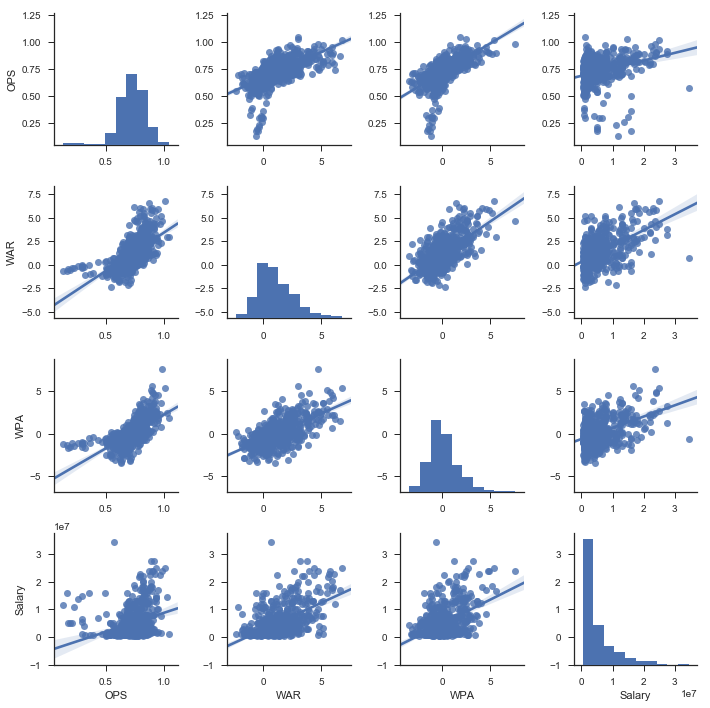

In [13]:
## Check the relationship between 'Salary' and the major indicators chosen among the various performance indicators by pairplot.

cols = ["OPS", "WAR", "WPA", "Salary"]
sns.set(style="ticks")
g = sns.pairplot(bat_df[cols], kind="reg")

In [14]:
bat_df.loc[7, 'Team'] = 'Rays'
bat_df.loc[34, 'Team'] = 'Rays'
bat_df.loc[56, 'Team'] = 'Rays'
bat_df.loc[125, 'Team'] = 'Rays'
bat_df.loc[150, 'Team'] = 'Rays'

# Reflect the annual Rate of Inflation in US
** * reference: http://www.multpl.com/inflation/table**

In [12]:
## Grasping the number of players who sign a FA contract by year

bat_df.groupby('Yr').count()['Name']

Yr
2005    59
2006    47
2007    50
2008    71
2009    62
2010    54
2011    59
2012    60
2013    53
2014    48
2015    54
2016    43
2017    11
Name: Name, dtype: int64

In [109]:
_2017 = bat_df.iloc[617:660, :]
_2016 = bat_df.iloc[563:617, :]
_2015 = bat_df.iloc[515:563, :]
_2014 = bat_df.iloc[462:515, :]
_2013 = bat_df.iloc[402:462, :]
_2012 = bat_df.iloc[343:402, :]
_2011 = bat_df.iloc[289:343, :]
_2010 = bat_df.iloc[227:289, :]
_2009 = bat_df.iloc[156:227, :]
_2008 = bat_df.iloc[106:156, :]
_2007 = bat_df.iloc[59:106, :]
_2006 = bat_df.iloc[:59, :]

In [118]:
_2017['SALARY'] = _2017.Salary * 1.0211
_2016['SALARY'] = _2016.Salary * 1.0211 * 1.0207
_2015['SALARY'] = _2015.Salary * 1.0211 * 1.0207 * 1.0173
_2014['SALARY'] = _2014.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176
_2013['SALARY'] = _2013.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176 * 1.015
_2012['SALARY'] = _2012.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176 * 1.015 * 1.0174
_2011['SALARY'] = _2011.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176 * 1.015 * 1.0174 * 1.0296
_2010['SALARY'] = _2010.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176 * 1.015 * 1.0174 * 1.0296 * 1.015
_2009['SALARY'] = _2009.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176 * 1.015 * 1.0174 * 1.0296 * 1.015 * 1.0272
_2008['SALARY'] = _2008.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176 * 1.015 * 1.0174 * 1.0296 * 1.015 * 1.0272 * 1.0009
_2007['SALARY'] = _2007.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176 * 1.015 * 1.0174 * 1.0296 * 1.015 * 1.0272 * 1.0009 \
* 1.0408
_2006['SALARY'] = _2006.Salary * 1.0211 * 1.0207 * 1.0173 * 1.0176 * 1.015 * 1.0174 * 1.0296 * 1.015 * 1.0272 * 1.0009 \
* 1.0408 * 1.0254

In [123]:
merge1 = pd.concat([_2006, _2007], axis=0)
merge2 = pd.concat([merge1, _2008], axis=0)
merge3 = pd.concat([merge2, _2009], axis=0)
merge4 = pd.concat([merge3, _2010], axis=0)
merge5 = pd.concat([merge4, _2011], axis=0)
merge6 = pd.concat([merge5, _2012], axis=0)
merge7 = pd.concat([merge6, _2013], axis=0)
merge8 = pd.concat([merge7, _2014], axis=0)
merge9 = pd.concat([merge8, _2015], axis=0)
merge10 = pd.concat([merge9, _2016], axis=0)
bat_dF = pd.concat([merge10, _2017], axis=0)

In [124]:
bat_dF.tail()

,Name,Yr,Team,G,AB,PA,H,Hits,Doubles,Triples,HR,R,RBI,BB,IBB,SO,BB_Percent,K_Percent,BB_per_K,BABIP,HBP,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,Contract_Yrs,Total_Salary,Salary,SALARY
655,Stephen Drew,2016,Nationals,70,143,165,38,18,11,1,8,24,21,16,0,31,9.7,18.8,0.52,0.278,2,4,0,3,0,1,-2.1,0.259,0.362,5.9,0.266,0.339,0.524,0.864,0.7,124.0,0.49,1.0,3500000.0,3500000.0,3573850.0
656,Trevor Plouffe,2016,Twins,84,319,344,83,57,13,1,12,35,47,19,0,60,5.5,17.4,0.32,0.284,2,3,1,11,1,0,-8.4,0.160,0.311,-2.1,0.260,0.303,0.420,0.723,-0.4,91.0,0.50,1.0,5250000.0,5250000.0,5360775.0
657,Welington Castillo,2016,Diamondbacks,113,416,457,110,72,24,0,14,41,68,33,3,121,7.2,26.5,0.27,0.337,4,4,0,5,2,0,9.8,0.159,0.319,0.4,0.264,0.322,0.423,0.745,1.6,91.0,0.64,2.0,13000000.0,6500000.0,6637150.0
658,Wilson Ramos,2016,Nationals,131,482,523,148,101,25,0,22,58,80,35,2,79,6.7,15.1,0.44,0.327,2,4,0,17,0,0,8.4,0.189,0.361,18.7,0.307,0.354,0.496,0.850,3.4,124.0,2.58,2.0,12500000.0,6250000.0,6381875.0
659,Yoenis Cespedes,2016,Mets,132,479,543,134,77,25,1,31,72,86,51,8,108,9.4,19.9,0.47,0.298,7,6,0,14,3,1,-9.2,0.251,0.369,22.8,0.280,0.354,0.530,0.884,3.2,135.0,3.21,4.0,110000000.0,27500000.0,28080250.0


In [125]:
bat_df2 = bat_dF.copy()

In [126]:
bat_df2 = pd.get_dummies(bat_df.iloc[:, 2:], columns=['Team'])

In [127]:
idx_2017 = 660

In [128]:
def scaled(col):
    return (col - col[:idx_2017].mean()) / (col[:idx_2017].std())

In [129]:
for col in bat_df2.columns:
    if not ("Yr_" in col or "Team_" in col):
        bat_df2[col] = np.log1p(np.vectorize(max)(0.0, bat_df2[col]))
        if col != "Salary":
            bat_df2[col] = scaled(bat_df2[col])

In [130]:
bat_df2.tail()

,G,AB,PA,H,Hits,Doubles,Triples,HR,R,RBI,BB,IBB,SO,BB_Percent,K_Percent,BB_per_K,BABIP,HBP,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,Contract_Yrs,Total_Salary,Salary,Team_Angels,Team_Astros,Team_Athletics,Team_Blue Jays,Team_Braves,Team_Brewers,Team_Cardinals,Team_Cubs,Team_Devil Rays,Team_Diamondbacks,Team_Dodgers,Team_Giants,Team_Indians,Team_Mariners,Team_Marlins,Team_Mets,Team_Nationals,Team_Orioles,Team_Padres,Team_Phillies,Team_Pirates,Team_Rangers,Team_Rays,Team_Red Sox,Team_Reds,Team_Rockies,Team_Royals,Team_Tigers,Team_Twins,Team_White Sox,Team_Yankees
666,0.003585,-0.129655,-0.238928,-0.141505,-0.437295,0.577149,-1.065946,0.181862,-0.433388,-0.025206,-0.990557,0.193408,0.508390,-1.367070,1.116765,-1.648359,0.411461,-1.605270,-0.124384,0.469256,-0.098204,-1.155895,-1.145663,0.813679,0.480764,-0.504687,-0.805535,-0.194999,-1.013796,0.260018,-0.189584,-0.567387,-0.074383,-0.649742,-0.613248,-0.360550,14.731802,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
667,-0.740782,-0.611999,-0.672587,-0.492297,-0.516351,-0.657239,-1.065946,0.284509,-0.646525,-0.025206,-0.805111,0.568456,0.256750,-0.572602,1.380862,-1.372936,0.802388,0.157751,-0.747586,-0.047191,-0.576371,-1.155895,-0.179229,1.338302,0.560670,-0.078493,-0.805535,0.000361,-0.309173,0.412798,0.167496,0.064149,0.132489,-0.649742,-0.613248,-0.281253,14.845130,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
668,-0.118090,0.172989,0.089927,0.319705,0.352751,-0.400170,-1.065946,0.980912,0.222623,0.505196,-0.251181,-1.238842,0.819793,-0.537110,1.106846,-1.213138,1.075326,-1.605270,-0.124384,-0.930061,0.544121,-1.155895,-1.145663,1.655912,1.017545,0.597257,0.857162,0.722006,0.067694,1.089184,0.757554,1.153411,0.423649,1.481712,0.490365,0.893157,15.830414,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
669,0.821513,0.664108,0.718974,0.646480,0.462415,0.517141,-1.065946,1.328532,0.891546,0.806752,1.172524,1.298022,1.158987,1.190198,0.677440,0.407388,0.295514,-0.208109,-1.812957,-0.930061,0.408674,-0.115423,-1.145663,-0.822114,1.433157,1.025458,1.617325,0.339256,0.927478,1.212322,1.149312,1.003692,0.632979,2.148631,0.490365,0.938315,15.894952,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
670,0.456791,0.612714,0.670806,0.763850,0.564612,0.634707,2.119505,1.168687,1.035327,0.727447,1.054632,-1.238842,0.443276,1.027503,-0.320770,1.214969,0.526965,0.157751,0.660758,-0.930061,-0.317270,0.157034,-1.145663,1.448745,1.675179,1.522710,1.953035,1.076520,1.327643,1.728489,1.628927,2.009377,0.721896,1.873989,1.273391,1.543560,16.354485,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [20]:
bat_copy = bat_df2.copy()

for col in ["Contract_Yrs", "Total_Salary", "Salary"]:
    try:
        del bat_copy[col]
    
    except:
        pass

In [21]:
bat_copy.rename(columns={"Team_Red Sox" : "Team_RedSox", "Team_Blue Jays" : "Team_BlueJays",
                         "Team_White Sox" : "Team_WhiteSox"}, inplace=True)

In [22]:
bat_df = bat_copy
bat_df.tail()

,Yr,G,AB,PA,H,Hits,Doubles,Triples,HR,R,RBI,BB,IBB,SO,BB_Percent,K_Percent,BB_per_K,BABIP,HBP,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,Team_Angels,Team_Astros,Team_Athletics,Team_BlueJays,Team_Braves,Team_Brewers,Team_Cardinals,Team_Cubs,Team_Diamondbacks,Team_Dodgers,Team_Giants,Team_Indians,Team_Mariners,Team_Marlins,Team_Mets,Team_Nationals,Team_Orioles,Team_Padres,Team_Phillies,Team_Pirates,Team_Rangers,Team_Rays,Team_RedSox,Team_Reds,Team_Rockies,Team_Royals,Team_Tigers,Team_Twins,Team_WhiteSox,Team_Yankees
666,1.987842,0.003585,-0.129655,-0.238928,-0.141505,-0.437295,0.577149,-1.065946,0.181862,-0.433388,-0.025206,-0.990557,0.193408,0.508390,-1.367070,1.116765,-1.648359,0.411461,-1.605270,-0.124384,0.469256,-0.098204,-1.155895,-1.145663,0.813679,0.480764,-0.504687,-0.805535,-0.194999,-1.013796,0.260018,-0.189584,-0.567387,-0.074383,-0.649742,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
667,1.987842,-0.740782,-0.611999,-0.672587,-0.492297,-0.516351,-0.657239,-1.065946,0.284509,-0.646525,-0.025206,-0.805111,0.568456,0.256750,-0.572602,1.380862,-1.372936,0.802388,0.157751,-0.747586,-0.047191,-0.576371,-1.155895,-0.179229,1.338302,0.560670,-0.078493,-0.805535,0.000361,-0.309173,0.412798,0.167496,0.064149,0.132489,-0.649742,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
668,1.987842,-0.118090,0.172989,0.089927,0.319705,0.352751,-0.400170,-1.065946,0.980912,0.222623,0.505196,-0.251181,-1.238842,0.819793,-0.537110,1.106846,-1.213138,1.075326,-1.605270,-0.124384,-0.930061,0.544121,-1.155895,-1.145663,1.655912,1.017545,0.597257,0.857162,0.722006,0.067694,1.089184,0.757554,1.153411,0.423649,1.481712,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
669,1.987842,0.821513,0.664108,0.718974,0.646480,0.462415,0.517141,-1.065946,1.328532,0.891546,0.806752,1.172524,1.298022,1.158987,1.190198,0.677440,0.407388,0.295514,-0.208109,-1.812957,-0.930061,0.408674,-0.115423,-1.145663,-0.822114,1.433157,1.025458,1.617325,0.339256,0.927478,1.212322,1.149312,1.003692,0.632979,2.148631,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
670,1.987842,0.456791,0.612714,0.670806,0.763850,0.564612,0.634707,2.119505,1.168687,1.035327,0.727447,1.054632,-1.238842,0.443276,1.027503,-0.320770,1.214969,0.526965,0.157751,0.660758,-0.930061,-0.317270,0.157034,-1.145663,1.448745,1.675179,1.522710,1.953035,1.076520,1.327643,1.728489,1.628927,2.009377,0.721896,1.873989,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [23]:
bat_train = bat_df.loc[:idx_2017-1, :]
bat_testX = bat_df.loc[idx_2017:, :]

In [24]:
bat_train.tail()

,Yr,G,AB,PA,H,Hits,Doubles,Triples,HR,R,RBI,BB,IBB,SO,BB_Percent,K_Percent,BB_per_K,BABIP,HBP,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,Team_Angels,Team_Astros,Team_Athletics,Team_BlueJays,Team_Braves,Team_Brewers,Team_Cardinals,Team_Cubs,Team_Diamondbacks,Team_Dodgers,Team_Giants,Team_Indians,Team_Mariners,Team_Marlins,Team_Mets,Team_Nationals,Team_Orioles,Team_Padres,Team_Phillies,Team_Pirates,Team_Rangers,Team_Rays,Team_RedSox,Team_Reds,Team_Rockies,Team_Royals,Team_Tigers,Team_Twins,Team_WhiteSox,Team_Yankees
655,1.690141,-0.873463,-1.350353,-1.310933,-1.027055,-1.517218,-0.400170,-0.004129,0.068391,-0.590082,-0.669430,-0.642911,-1.238842,-1.135526,0.509573,0.195937,0.156848,-0.267302,-0.208109,0.660758,-0.930061,-0.893485,-1.155895,-0.179229,-0.822114,1.795032,0.948119,0.738887,0.339256,0.398407,1.466903,1.134732,-0.223610,0.548738,0.199694,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
656,1.690141,-0.437784,0.055895,-0.014767,0.107016,0.158711,-0.182822,-0.004129,0.464422,-0.085907,0.351121,-0.432300,-1.238842,-0.008458,-0.719909,-0.005181,-0.756138,-0.125613,-0.208109,0.317785,-0.047191,0.667775,-0.499430,-1.145663,-0.822114,0.255204,-0.058369,-0.805535,0.194476,-0.351367,0.283613,0.065299,-1.163152,0.132489,0.213943,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
657,1.690141,0.272843,0.522171,0.487226,0.518979,0.504132,0.634707,-1.065946,0.618539,0.127230,0.825849,0.255347,0.568456,1.202484,-0.146827,1.096891,-1.006033,1.097960,0.441534,0.660758,-0.930061,-0.317270,-0.115423,-1.145663,1.567002,0.238988,0.102074,-0.536496,0.291072,0.046892,0.318944,0.237800,0.528697,0.132489,0.404014,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
658,1.690141,0.627744,0.780929,0.725749,0.954152,1.006478,0.690007,-1.065946,1.078887,0.597149,1.035598,0.329419,0.193408,0.465251,-0.302013,-0.371404,-0.193046,0.870854,-0.208109,0.660758,-0.930061,1.243990,-1.155895,-1.145663,1.427607,0.719470,0.928749,1.577733,1.310592,0.704881,1.156463,1.032231,1.460209,0.548738,2.066918,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
659,1.690141,0.646014,0.769957,0.792117,0.808307,0.603620,0.690007,-0.004129,1.434550,0.891546,1.129076,0.805958,1.625658,1.005641,0.439426,0.344222,-0.059609,0.202435,1.039261,1.177917,-0.930061,0.984889,0.157034,-0.179229,-0.822114,1.675179,1.083314,1.728909,0.674424,0.704881,1.532684,1.279835,1.377840,0.663270,2.412209,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
bat_trainY = pd.DataFrame(bat_df2['Salary'])
bat_trainY = bat_trainY.loc[:idx_2017-1, :]

In [26]:
bat_trainY.tail()

,Salary
655,15.068274
656,15.473739
657,15.687313
658,15.648092
659,17.129697


In [27]:
bat_testX.head()

,Yr,G,AB,PA,H,Hits,Doubles,Triples,HR,R,RBI,BB,IBB,SO,BB_Percent,K_Percent,BB_per_K,BABIP,HBP,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,Team_Angels,Team_Astros,Team_Athletics,Team_BlueJays,Team_Braves,Team_Brewers,Team_Cardinals,Team_Cubs,Team_Diamondbacks,Team_Dodgers,Team_Giants,Team_Indians,Team_Mariners,Team_Marlins,Team_Mets,Team_Nationals,Team_Orioles,Team_Padres,Team_Phillies,Team_Pirates,Team_Rangers,Team_Rays,Team_RedSox,Team_Reds,Team_Rockies,Team_Royals,Team_Tigers,Team_Twins,Team_WhiteSox,Team_Yankees
660,1.987842,1.016584,1.078770,1.155935,0.954152,0.750246,1.225078,1.057688,1.124723,1.196283,1.019348,1.502372,1.298022,0.765477,1.207630,-0.547271,1.735744,-0.362131,0.869443,-0.124384,-0.930061,0.667775,0.541041,-0.179229,-0.822114,0.829838,0.714731,1.483048,0.170279,0.887139,0.691244,0.794998,1.291451,0.470480,0.297487,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
661,1.987842,-0.299413,-0.223854,-0.164736,-0.162471,-0.643333,0.320081,-1.065946,0.814895,0.024764,0.237298,0.399486,-1.238842,0.631760,0.932254,1.194852,-0.238144,0.434597,0.869443,-0.747586,-0.930061,-0.893485,-1.155895,-1.145663,1.041649,1.765140,1.044758,1.263611,0.049006,0.704881,1.323486,1.142024,0.896348,0.504573,1.142887,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
662,1.987842,0.888299,1.028806,1.018090,0.883028,0.544721,0.891776,0.616994,1.590908,1.069052,1.337154,0.947471,-1.238842,1.442911,0.391529,0.665795,-0.329293,-0.362131,-0.208109,0.317785,-0.930061,0.667775,-0.499430,-0.179229,-0.822114,1.720213,0.714731,1.416377,0.049006,0.088481,1.290214,0.899297,1.153411,0.481939,1.787576,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
663,1.987842,-1.722341,-1.544075,-1.625451,-1.807585,-1.775290,-1.949185,-0.004129,-0.804964,-1.296376,-1.700836,-1.467096,-0.335193,-1.029613,-0.608612,0.824501,-1.160737,-1.996370,-0.208109,-1.812957,-0.930061,-1.302316,0.813499,1.098328,0.313838,-0.590151,-1.869277,-0.805535,-2.011990,-1.892811,-1.440989,-1.701812,-1.163152,-1.141643,-0.649742,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
664,1.987842,0.627744,0.162660,0.099582,0.273269,-0.034437,0.517141,-0.004129,0.980912,0.282747,0.767700,-0.196028,1.097057,0.651501,-0.433599,0.835494,-1.057191,0.503899,-0.723760,0.660758,-0.930061,-0.317270,-1.155895,-1.145663,-0.822114,1.630036,0.636473,0.933371,0.531232,-0.015609,1.444919,0.965926,0.528697,0.411684,0.455345,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
bat_testY = pd.DataFrame(bat_df2['Salary'])
bat_testY = bat_testY.loc[idx_2017:, :]

In [29]:
bat_testY.head()

,Salary
660,16.811243
661,15.262430
662,16.380460
663,14.375127
664,15.201805


In [30]:
to_list = bat_train.columns.tolist()
salary_str = "Salary ~ "

join_list = " + ".join(to_list)
ff_list = salary_str + join_list
ff_list

'Salary ~ Yr + G + AB + PA + H + Hits + Doubles + Triples + HR + R + RBI + BB + IBB + SO + BB_Percent + K_Percent + BB_per_K + BABIP + HBP + SF + SH + GDP + SB + CS + Def + ISO + wOBA + wRAA + AVG + OBP + SLG + OPS + WAR + wRC_Plus + WPA + Team_Angels + Team_Astros + Team_Athletics + Team_BlueJays + Team_Braves + Team_Brewers + Team_Cardinals + Team_Cubs + Team_Diamondbacks + Team_Dodgers + Team_Giants + Team_Indians + Team_Mariners + Team_Marlins + Team_Mets + Team_Nationals + Team_Orioles + Team_Padres + Team_Phillies + Team_Pirates + Team_Rangers + Team_Rays + Team_RedSox + Team_Reds + Team_Rockies + Team_Royals + Team_Tigers + Team_Twins + Team_WhiteSox + Team_Yankees'

In [31]:
ff_list1 = 'Salary ~ scale(Yr) + scale(I(Yr**2)) + G + AB + PA + H + Hits + Doubles + Triples + HR + R + RBI + BB + IBB \
+ SO + BB_Percent + K_Percent + BB_per_K + BABIP + HBP + SF + SH + GDP + SB + CS + Def + ISO + wOBA + wRAA + AVG + OBP \
+ SLG + OPS + WAR + wRC_Plus + WPA + Team_Angels + Team_Astros + Team_Athletics + Team_BlueJays + Team_Braves \
+ Team_Brewers + Team_Cardinals + Team_Cubs + Team_Diamondbacks + Team_Dodgers + Team_Giants + Team_Indians + Team_Mariners \
+ Team_Marlins + Team_Mets + Team_Nationals + Team_Orioles + Team_Padres + Team_Phillies + Team_Pirates + Team_Rangers \
+ Team_Rays + Team_RedSox + Team_Reds + Team_Rockies + Team_Royals + Team_Tigers + Team_Twins + Team_WhiteSox + Team_Yankees'

In [32]:
ff_list2 = 'Salary ~ scale(Yr) + scale(I(Yr**2)) + scale(I(Yr**3)) + G + AB + PA + H + Hits + Doubles + Triples + HR + R \
+ RBI + BB + IBB + SO + BB_Percent + K_Percent + BB_per_K + BABIP + HBP + SF + SH + GDP + SB + CS + Def + ISO + wOBA + wRAA \
+ AVG + OBP + SLG + OPS + WAR + wRC_Plus + WPA + Team_Angels + Team_Astros + Team_Athletics + Team_BlueJays + Team_Braves \
+ Team_Brewers + Team_Cardinals + Team_Cubs + Team_Diamondbacks + Team_Dodgers + Team_Giants + Team_Indians + Team_Mariners \
+ Team_Marlins + Team_Mets + Team_Nationals + Team_Orioles + Team_Padres + Team_Phillies + Team_Pirates + Team_Rangers \
+ Team_Rays + Team_RedSox + Team_Reds + Team_Rockies + Team_Royals + Team_Tigers + Team_Twins + Team_WhiteSox + Team_Yankees'

In [33]:
ff_list3 = 'Salary ~ scale(Yr) + scale(I(Yr**2)) + scale(I(Yr**3)) + scale(I(Yr**4)) + G + AB + PA + H + Hits + Doubles \
+ Triples + HR + R + RBI + BB + IBB + SO + BB_Percent + K_Percent + BB_per_K + BABIP + HBP + SF + SH + GDP + SB + CS + Def \
+ ISO + wOBA + wRAA + AVG + OBP + SLG + OPS + WAR + wRC_Plus + WPA + Team_Angels + Team_Astros + Team_Athletics \
+ Team_BlueJays + Team_Braves + Team_Brewers + Team_Cardinals + Team_Cubs + Team_Diamondbacks + Team_Dodgers + Team_Giants \
+ Team_Indians + Team_Mariners + Team_Marlins + Team_Mets + Team_Nationals + Team_Orioles + Team_Padres + Team_Phillies \
+ Team_Pirates + Team_Rangers + Team_Rays + Team_RedSox + Team_Reds + Team_Rockies + Team_Royals + Team_Tigers + Team_Twins \
+ Team_WhiteSox + Team_Yankees'

In [34]:
ff_list4 = 'Salary ~ scale(np.log(Yr)) + G + AB + PA + H + Hits + Doubles + Triples + HR + R + RBI + BB + IBB \
+ SO + BB_Percent + K_Percent + BB_per_K + BABIP + HBP + SF + SH + GDP + SB + CS + Def + ISO + wOBA + wRAA + AVG + OBP \
+ SLG + OPS + WAR + wRC_Plus + WPA + Team_Angels + Team_Astros + Team_Athletics + Team_BlueJays + Team_Braves \
+ Team_Brewers + Team_Cardinals + Team_Cubs + Team_Diamondbacks + Team_Dodgers + Team_Giants + Team_Indians + Team_Mariners \
+ Team_Marlins + Team_Mets + Team_Nationals + Team_Orioles + Team_Padres + Team_Phillies + Team_Pirates + Team_Rangers \
+ Team_Rays + Team_RedSox + Team_Reds + Team_Rockies + Team_Royals + Team_Tigers + Team_Twins + Team_WhiteSox + Team_Yankees'

In [35]:
bat_trainX = pd.concat([bat_train, bat_trainY], axis=1)
print(bat_trainX.shape)
bat_trainX.tail()

(660, 66)


,Yr,G,AB,PA,H,Hits,Doubles,Triples,HR,R,RBI,BB,IBB,SO,BB_Percent,K_Percent,BB_per_K,BABIP,HBP,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,Team_Angels,Team_Astros,Team_Athletics,Team_BlueJays,Team_Braves,Team_Brewers,Team_Cardinals,Team_Cubs,Team_Diamondbacks,Team_Dodgers,Team_Giants,Team_Indians,Team_Mariners,Team_Marlins,Team_Mets,Team_Nationals,Team_Orioles,Team_Padres,Team_Phillies,Team_Pirates,Team_Rangers,Team_Rays,Team_RedSox,Team_Reds,Team_Rockies,Team_Royals,Team_Tigers,Team_Twins,Team_WhiteSox,Team_Yankees,Salary
655,1.690141,-0.873463,-1.350353,-1.310933,-1.027055,-1.517218,-0.400170,-0.004129,0.068391,-0.590082,-0.669430,-0.642911,-1.238842,-1.135526,0.509573,0.195937,0.156848,-0.267302,-0.208109,0.660758,-0.930061,-0.893485,-1.155895,-0.179229,-0.822114,1.795032,0.948119,0.738887,0.339256,0.398407,1.466903,1.134732,-0.223610,0.548738,0.199694,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.068274
656,1.690141,-0.437784,0.055895,-0.014767,0.107016,0.158711,-0.182822,-0.004129,0.464422,-0.085907,0.351121,-0.432300,-1.238842,-0.008458,-0.719909,-0.005181,-0.756138,-0.125613,-0.208109,0.317785,-0.047191,0.667775,-0.499430,-1.145663,-0.822114,0.255204,-0.058369,-0.805535,0.194476,-0.351367,0.283613,0.065299,-1.163152,0.132489,0.213943,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,15.473739
657,1.690141,0.272843,0.522171,0.487226,0.518979,0.504132,0.634707,-1.065946,0.618539,0.127230,0.825849,0.255347,0.568456,1.202484,-0.146827,1.096891,-1.006033,1.097960,0.441534,0.660758,-0.930061,-0.317270,-0.115423,-1.145663,1.567002,0.238988,0.102074,-0.536496,0.291072,0.046892,0.318944,0.237800,0.528697,0.132489,0.404014,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.687313
658,1.690141,0.627744,0.780929,0.725749,0.954152,1.006478,0.690007,-1.065946,1.078887,0.597149,1.035598,0.329419,0.193408,0.465251,-0.302013,-0.371404,-0.193046,0.870854,-0.208109,0.660758,-0.930061,1.243990,-1.155895,-1.145663,1.427607,0.719470,0.928749,1.577733,1.310592,0.704881,1.156463,1.032231,1.460209,0.548738,2.066918,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.648092
659,1.690141,0.646014,0.769957,0.792117,0.808307,0.603620,0.690007,-0.004129,1.434550,0.891546,1.129076,0.805958,1.625658,1.005641,0.439426,0.344222,-0.059609,0.202435,1.039261,1.177917,-0.930061,0.984889,0.157034,-0.179229,-0.822114,1.675179,1.083314,1.728909,0.674424,0.704881,1.532684,1.279835,1.377840,0.663270,2.412209,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.129697


In [36]:
model0 = sm.OLS.from_formula(ff_list, bat_trainX)
result0 = model0.fit()
print(result0.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     13.61
Date:                Thu, 25 Jan 2018   Prob (F-statistic):           9.93e-81
Time:                        15:09:39   Log-Likelihood:                -638.63
No. Observations:                 660   AIC:                             1407.
Df Residuals:                     595   BIC:                             1699.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            14.4001      0.02

In [37]:
model0_1 = sm.OLS.from_formula(ff_list1, bat_trainX)
result0_1 = model0_1.fit()
print(result0_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     13.79
Date:                Thu, 25 Jan 2018   Prob (F-statistic):           2.45e-82
Time:                        15:09:39   Log-Likelihood:                -632.64
No. Observations:                 660   AIC:                             1397.
Df Residuals:                     594   BIC:                             1694.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            14.3982      0.02

In [38]:
model0_2 = sm.OLS.from_formula(ff_list2, bat_trainX)
result0_2 = model0_2.fit()
print(result0_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     13.70
Date:                Thu, 25 Jan 2018   Prob (F-statistic):           1.50e-82
Time:                        15:09:39   Log-Likelihood:                -630.48
No. Observations:                 660   AIC:                             1395.
Df Residuals:                     593   BIC:                             1696.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            14.3994      0.02

In [39]:
model0_3 = sm.OLS.from_formula(ff_list3, bat_trainX)
result0_3 = model0_3.fit()
print(result0_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     13.48
Date:                Thu, 25 Jan 2018   Prob (F-statistic):           5.51e-82
Time:                        15:09:39   Log-Likelihood:                -630.46
No. Observations:                 660   AIC:                             1397.
Df Residuals:                     592   BIC:                             1702.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            14.3995      0.02

In [40]:
bat_yr = bat_yr.iloc[:idx_2017, :]
bat_yr.tail()

,Yr
655,2016
656,2016
657,2016
658,2016
659,2016


In [41]:
temp = bat_trainX.iloc[:, 1:]
temp.tail()

,G,AB,PA,H,Hits,Doubles,Triples,HR,R,RBI,BB,IBB,SO,BB_Percent,K_Percent,BB_per_K,BABIP,HBP,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,Team_Angels,Team_Astros,Team_Athletics,Team_BlueJays,Team_Braves,Team_Brewers,Team_Cardinals,Team_Cubs,Team_Diamondbacks,Team_Dodgers,Team_Giants,Team_Indians,Team_Mariners,Team_Marlins,Team_Mets,Team_Nationals,Team_Orioles,Team_Padres,Team_Phillies,Team_Pirates,Team_Rangers,Team_Rays,Team_RedSox,Team_Reds,Team_Rockies,Team_Royals,Team_Tigers,Team_Twins,Team_WhiteSox,Team_Yankees,Salary
655,-0.873463,-1.350353,-1.310933,-1.027055,-1.517218,-0.400170,-0.004129,0.068391,-0.590082,-0.669430,-0.642911,-1.238842,-1.135526,0.509573,0.195937,0.156848,-0.267302,-0.208109,0.660758,-0.930061,-0.893485,-1.155895,-0.179229,-0.822114,1.795032,0.948119,0.738887,0.339256,0.398407,1.466903,1.134732,-0.223610,0.548738,0.199694,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.068274
656,-0.437784,0.055895,-0.014767,0.107016,0.158711,-0.182822,-0.004129,0.464422,-0.085907,0.351121,-0.432300,-1.238842,-0.008458,-0.719909,-0.005181,-0.756138,-0.125613,-0.208109,0.317785,-0.047191,0.667775,-0.499430,-1.145663,-0.822114,0.255204,-0.058369,-0.805535,0.194476,-0.351367,0.283613,0.065299,-1.163152,0.132489,0.213943,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,15.473739
657,0.272843,0.522171,0.487226,0.518979,0.504132,0.634707,-1.065946,0.618539,0.127230,0.825849,0.255347,0.568456,1.202484,-0.146827,1.096891,-1.006033,1.097960,0.441534,0.660758,-0.930061,-0.317270,-0.115423,-1.145663,1.567002,0.238988,0.102074,-0.536496,0.291072,0.046892,0.318944,0.237800,0.528697,0.132489,0.404014,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.687313
658,0.627744,0.780929,0.725749,0.954152,1.006478,0.690007,-1.065946,1.078887,0.597149,1.035598,0.329419,0.193408,0.465251,-0.302013,-0.371404,-0.193046,0.870854,-0.208109,0.660758,-0.930061,1.243990,-1.155895,-1.145663,1.427607,0.719470,0.928749,1.577733,1.310592,0.704881,1.156463,1.032231,1.460209,0.548738,2.066918,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.648092
659,0.646014,0.769957,0.792117,0.808307,0.603620,0.690007,-0.004129,1.434550,0.891546,1.129076,0.805958,1.625658,1.005641,0.439426,0.344222,-0.059609,0.202435,1.039261,1.177917,-0.930061,0.984889,0.157034,-0.179229,-0.822114,1.675179,1.083314,1.728909,0.674424,0.704881,1.532684,1.279835,1.377840,0.663270,2.412209,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.129697


In [42]:
temp.insert(0, 'Yr', bat_yr)

In [43]:
bat_tempX = temp.copy()
bat_tempX.tail()

,Yr,G,AB,PA,H,Hits,Doubles,Triples,HR,R,RBI,BB,IBB,SO,BB_Percent,K_Percent,BB_per_K,BABIP,HBP,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,Team_Angels,Team_Astros,Team_Athletics,Team_BlueJays,Team_Braves,Team_Brewers,Team_Cardinals,Team_Cubs,Team_Diamondbacks,Team_Dodgers,Team_Giants,Team_Indians,Team_Mariners,Team_Marlins,Team_Mets,Team_Nationals,Team_Orioles,Team_Padres,Team_Phillies,Team_Pirates,Team_Rangers,Team_Rays,Team_RedSox,Team_Reds,Team_Rockies,Team_Royals,Team_Tigers,Team_Twins,Team_WhiteSox,Team_Yankees,Salary
655,2016,-0.873463,-1.350353,-1.310933,-1.027055,-1.517218,-0.400170,-0.004129,0.068391,-0.590082,-0.669430,-0.642911,-1.238842,-1.135526,0.509573,0.195937,0.156848,-0.267302,-0.208109,0.660758,-0.930061,-0.893485,-1.155895,-0.179229,-0.822114,1.795032,0.948119,0.738887,0.339256,0.398407,1.466903,1.134732,-0.223610,0.548738,0.199694,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.068274
656,2016,-0.437784,0.055895,-0.014767,0.107016,0.158711,-0.182822,-0.004129,0.464422,-0.085907,0.351121,-0.432300,-1.238842,-0.008458,-0.719909,-0.005181,-0.756138,-0.125613,-0.208109,0.317785,-0.047191,0.667775,-0.499430,-1.145663,-0.822114,0.255204,-0.058369,-0.805535,0.194476,-0.351367,0.283613,0.065299,-1.163152,0.132489,0.213943,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,15.473739
657,2016,0.272843,0.522171,0.487226,0.518979,0.504132,0.634707,-1.065946,0.618539,0.127230,0.825849,0.255347,0.568456,1.202484,-0.146827,1.096891,-1.006033,1.097960,0.441534,0.660758,-0.930061,-0.317270,-0.115423,-1.145663,1.567002,0.238988,0.102074,-0.536496,0.291072,0.046892,0.318944,0.237800,0.528697,0.132489,0.404014,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.687313
658,2016,0.627744,0.780929,0.725749,0.954152,1.006478,0.690007,-1.065946,1.078887,0.597149,1.035598,0.329419,0.193408,0.465251,-0.302013,-0.371404,-0.193046,0.870854,-0.208109,0.660758,-0.930061,1.243990,-1.155895,-1.145663,1.427607,0.719470,0.928749,1.577733,1.310592,0.704881,1.156463,1.032231,1.460209,0.548738,2.066918,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.648092
659,2016,0.646014,0.769957,0.792117,0.808307,0.603620,0.690007,-0.004129,1.434550,0.891546,1.129076,0.805958,1.625658,1.005641,0.439426,0.344222,-0.059609,0.202435,1.039261,1.177917,-0.930061,0.984889,0.157034,-0.179229,-0.822114,1.675179,1.083314,1.728909,0.674424,0.704881,1.532684,1.279835,1.377840,0.663270,2.412209,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.129697


In [44]:
model0_4 = sm.OLS.from_formula(ff_list4, bat_tempX)
result0_4 = model0_4.fit()
print(result0_4.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     13.61
Date:                Thu, 25 Jan 2018   Prob (F-statistic):           9.93e-81
Time:                        15:09:39   Log-Likelihood:                -638.63
No. Observations:                 660   AIC:                             1407.
Df Residuals:                     595   BIC:                             1699.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            14.4001      0.02

### * 1st OLS analysis

In [45]:
model1 = sm.OLS(bat_trainY, bat_train)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     13.61
Date:                Thu, 25 Jan 2018   Prob (F-statistic):           9.93e-81
Time:                        15:09:39   Log-Likelihood:                -638.63
No. Observations:                 660   AIC:                             1407.
Df Residuals:                     595   BIC:                             1699.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Yr                    0.2090      0.03

## * Eliminating Outliers above ANALYSIS

In [46]:
def elim_outliers(result, dfX, dfY):
    influence = result.get_influence()
    cooks_d2, pvals = influence.cooks_distance
    fox_cr = 4 / (len(dfY) - len(dfX.columns) - 1)
    idx = np.where(cooks_d2 > fox_cr)[0]
    
    return idx

In [47]:
idx1_num = elim_outliers(result1, bat_train, bat_trainY)

print(idx1_num, '\n')
print("Outliers: {}".format(len(idx1_num)))

[  3   5  27  31  33  44  65  74  83  86 120 138 142 164 166 199 204 211
 214 223 258 261 266 282 294 306 313 356 435 462 465 512 541 562 609 616
 627] 

Outliers: 37


In [48]:
bat_dfX1 = bat_train.drop(idx1_num)
bat_dfY1 = bat_trainY.drop(idx1_num)

In [49]:
bat_dfX1.shape, bat_dfY1.shape

((623, 65), (623, 1))

### 2nd OLS analysis

In [50]:
model2 = sm.OLS(bat_dfY1, bat_dfX1)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     19.44
Date:                Thu, 25 Jan 2018   Prob (F-statistic):          4.09e-105
Time:                        15:09:40   Log-Likelihood:                -508.35
No. Observations:                 623   AIC:                             1147.
Df Residuals:                     558   BIC:                             1435.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Yr                    0.2333      0.03

## * Filtrating P-VALUE above OLS model

In [51]:
def extracted_pvals(result, cond):
    pvals = pd.DataFrame(result.pvalues)
    pvals.columns = ['P_values']
    pvals['P_values'] = pvals[pvals.P_values < cond]
    pvals = pvals.dropna().sort_values('P_values')
    
    return pvals

In [52]:
pvals = extracted_pvals(result2, 0.05)

extracted_feature = pvals.index.values
bat_dfX2_1 = bat_dfX1.loc[:, extracted_feature]

### * 2-1 OLS analysis

In [53]:
model2_1 = sm.OLS(bat_dfY1, bat_dfX2_1)
result2_1 = model2_1.fit()
print(result2_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     31.03
Date:                Thu, 25 Jan 2018   Prob (F-statistic):          5.74e-112
Time:                        15:09:40   Log-Likelihood:                -541.26
No. Observations:                 623   AIC:                             1157.
Df Residuals:                     586   BIC:                             1321.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Team_Indians         14.6377      0.14

## * Filtrating P-VALUE above OLS model

In [54]:
pvals2_1 = extracted_pvals(result2_1, 0.05)

extracted_feature2_1 = pvals2_1.index.values
bat_dfX2_2 = bat_dfX2_1.loc[:, extracted_feature2_1]

### * 2-2 OLS anlaysis

In [55]:
model2_2 = sm.OLS(bat_dfY1, bat_dfX2_2)
result2_2 = model2_2.fit()
print(result2_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     31.03
Date:                Thu, 25 Jan 2018   Prob (F-statistic):          5.74e-112
Time:                        15:09:40   Log-Likelihood:                -541.26
No. Observations:                 623   AIC:                             1157.
Df Residuals:                     586   BIC:                             1321.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Team_Indians         14.6377      0.14